In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import cv2
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

## Reading Eclipse Dataset ( Whole, Sim & Dissim)

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe (Eclipse)
df_whole=pd.read_csv('drive/MyDrive/Saner/Dataset/Dataset (Whole-Primary)/firefox_preproccessed_whole_dataset.csv')
df_whole 

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Resolution,Updated,Description,Duplicate_Bug_Ids
0,0,1399936,defect,Shield unenrolls users in active preference ex...,Firefox,Normandy Client,VERIFIED,FIXED,2018-01-27 11:10:40,the activity stream team is conducting a study...,NaN
1,1,1387208,defect,browser_as_load_location.js is permafailing on...,Firefox,New Tab Page,RESOLVED,FIXED,2019-06-28 14:29:46,filed by rvandermeulen at mozilla com j...,NaN
2,2,1368432,defect,web.skype.com is inaccessible: SEC_ERROR_OCSP_...,Firefox,Untriaged,RESOLVED,DUPLICATE,2017-05-29 04:49:00,user agent mozilla gecko firefox ...,1368433.0
3,3,1383741,defect,Perma failure when 56 merge to beta in browser...,Firefox,Preferences,RESOLVED,FIXED,2017-07-27 02:02:17,found via uplift simulations perma failure w...,NaN
4,4,1388753,defect,Bookmarks and history pages in Library sub men...,Firefox,Toolbars and Customization,VERIFIED,FIXED,2017-09-22 10:09:03,user agent mozilla gecko firefox ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
38285,39656,1734719,task,Fix test_bug1266815.html to work when download...,Firefox,Downloads Panel,RESOLVED,FIXED,2021-10-12 02:34:06,this test needs the external application choos...,NaN
38286,39657,1708329,enhancement,Update more of the icons in browser/themes/sha...,Firefox,Theme,VERIFIED,FIXED,2021-05-11 07:00:56,browser themes shared icons back svg go ...,NaN
38287,39658,1709129,enhancement,Downloads panel should auto open on download (...,Firefox,Downloads Panel,RESOLVED,FIXED,2022-01-15 04:53:04,created attachment download opened panel ...,NaN
38288,39659,1701347,task,Menulist chrome tests are unhappy with proton ...,Firefox,Theme,RESOLVED,FIXED,2021-03-27 13:57:58,mike kindly offered to look into this,NaN


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_sim=pd.read_csv('drive/MyDrive/Saner/Dataset/Firefox/Firefox_final_sim.csv')
df_sim = df_sim[:120]
df_sim 

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
0,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.029530,0.037285,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
1,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.028173,0.039369,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
2,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.041752,0.052553,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
3,1513,1328104,defect,Add Search Engine Button Does Not Work,Firefox,Search,RESOLVED,0.030858,0.041078,0.082702,DUPLICATE,2017-03-31 07:05:33,user agent mozilla gecko firefox ...,1323525.0
4,1626,1333599,defect,URL Spoofing by using onbeforeunload and openi...,Firefox,Address Bar,RESOLVED,0.038145,0.051607,0.094942,DUPLICATE,2020-07-09 13:23:51,i have noticed that the onbeforeunload dialog ...,1481994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4935,1418563,defect,Close firefox force,Firefox,Untriaged,RESOLVED,0.031508,0.041096,0.085808,DUPLICATE,2017-11-18 13:21:29,user agent mozilla gecko firefox ...,613785.0
116,4958,1378023,defect,Black tab strip background in nightly makes so...,Firefox,Theme,RESOLVED,0.029496,0.037935,0.079139,DUPLICATE,2017-07-04 01:29:53,created attachment dark favicons on dark tab...,1369026.0
117,4960,1398128,defect,Height of URL bar changes when focused when co...,Firefox,Theme,RESOLVED,0.031270,0.040722,0.089539,DUPLICATE,2017-09-12 05:00:34,created attachment focused tab bar png user...,1397278.0
118,5046,1398358,defect,Library > Downloads Panel does not know if a d...,Firefox,Downloads Panel,RESOLVED,0.029256,0.037887,0.083420,DUPLICATE,2017-09-13 09:30:19,user agent mozilla gecko firefox ...,1395615.0


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_dissim=pd.read_csv('drive/MyDrive/Saner/Dataset/Firefox/Firefox_final_dis.csv')
df_dissim = df_dissim[: 120]
df_dissim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
0,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.010312,0.015288,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
1,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.014964,0.020157,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
2,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.009494,0.015773,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
3,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.015985,0.019335,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
4,312,1386531,enhancement,Add smile/sad face image for the default brows...,Firefox,Preferences,RESOLVED,0.009071,0.011686,0.023955,DUPLICATE,2017-08-09 09:16:16,add smile sad face image for the default brows...,1361957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3036,1414181,defect,Intermittent services/sync/tests/unit/test_syn...,Firefox,Sync,RESOLVED,0.012882,0.016016,0.025214,DUPLICATE,2017-11-05 17:42:55,filed by nbeleuzu at mozilla com job id...,1368209.0
116,3089,1398384,defect,Intermittent browser/components/sessionstore/t...,Firefox,Session Restore,RESOLVED,0.012568,0.015949,0.027125,DUPLICATE,2017-09-17 18:45:09,filed by wkocher at mozilla com job id ...,1034036.0
117,3113,1386231,defect,Please make addon icons movable inside the loc...,Firefox,Address Bar,RESOLVED,0.011705,0.014853,0.034953,DUPLICATE,2017-11-30 06:24:55,created attachment regression png nightly ...,1407972.0
118,3160,1388598,defect,Intermittent browser/base/content/test/siteIde...,Firefox,Site Identity,RESOLVED,0.011905,0.014923,0.024423,DUPLICATE,2017-10-01 18:47:58,filed by philringnalda at gmail com job...,1315092.0


## Statistics of dataset (all three for eclipse)

In [ ]:
# Statistics of description for the whole dataset
FEATURES_whole = ['Description']
print('Description of length of the feature columns')
df_whole[FEATURES_whole].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,38290.000000
mean,1030.013581
std,2668.724674
min,2.000000
25%,245.000000
50%,441.000000
75%,768.000000
max,57288.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_sim = ['Description']
print('Description of length of the feature columns')
df_sim[FEATURES_sim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,120.000000
mean,802.366667
std,405.173538
min,258.000000
25%,503.750000
50%,704.000000
75%,1003.500000
max,2121.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_dissim = ['Description']
print('Description of length of the feature columns')
df_dissim[FEATURES_dissim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,120.000000
mean,356.141667
std,1277.212618
min,35.000000
25%,104.750000
50%,141.000000
75%,276.000000
max,13881.000000


## Skewness & kurt of textually sim & dissim

Skewness:
0.89
kurt:
0.37
Mean:
0.09
Median:
0.09
Standard Deviation:
0.01


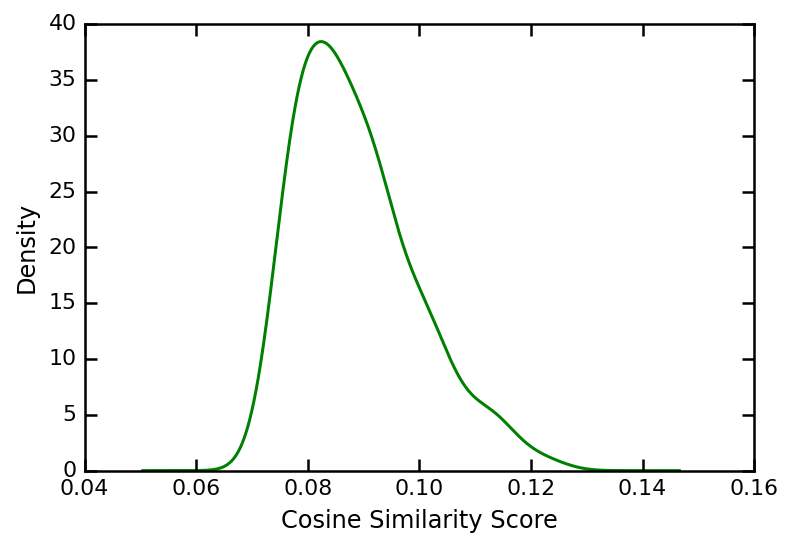

In [ ]:
# Textually similar dataset
import pandas as pds

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];

skewness = df_sim_cos.skew();
kurt = df_sim_cos.kurt();
mean = df_sim_cos.mean()
median = df_sim_cos.median()
std = df_sim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.
# Positive kurtosis indicates a relatively peaked distribution.


plt.figure()
df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

Skewness:
-0.5
kurt:
-0.67
Mean:
0.03
Median:
0.03
Standard Deviation:
0.01


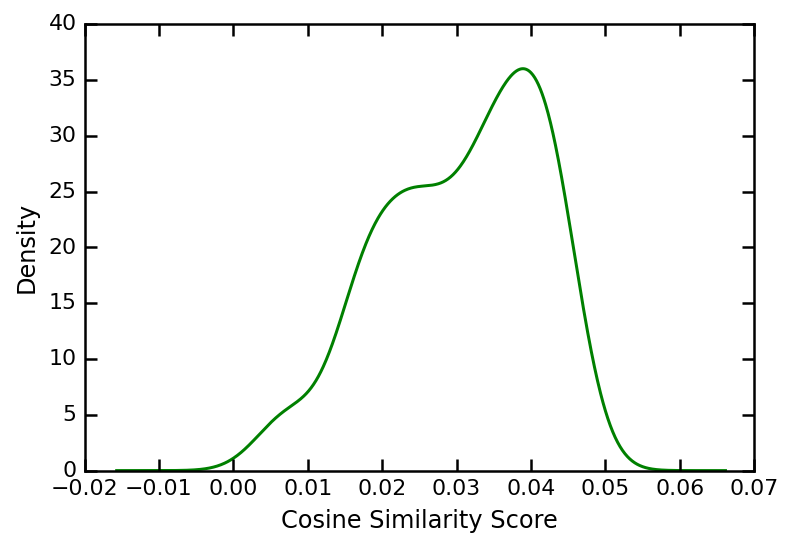

In [ ]:
# Textually dissimilar dataset
import pandas as pds

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];

skewness = df_dissim_cos.skew();
kurt = df_dissim_cos.kurt();
mean = df_dissim_cos.mean()
median = df_dissim_cos.median()
std = df_dissim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# Negative kurtosis indicates a relatively flat distribution.
plt.figure()
df_dissim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

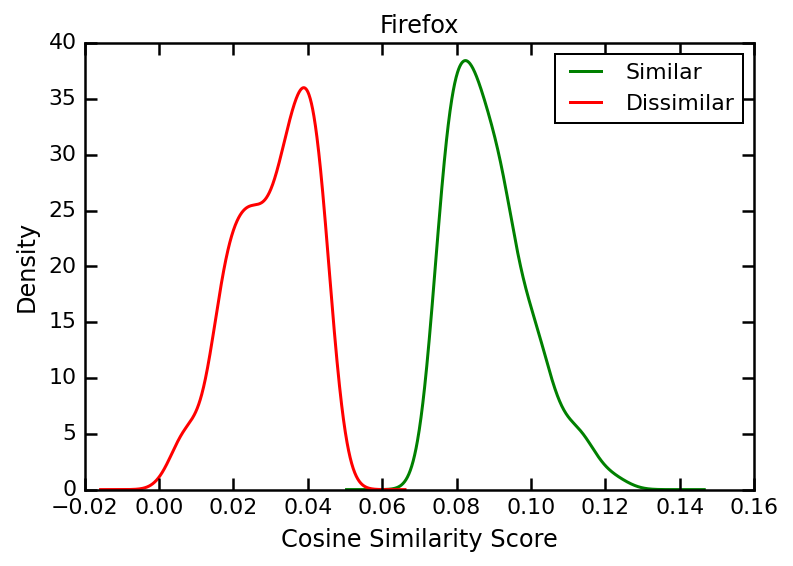

<Figure size 432x288 with 0 Axes>

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
# create data
fig, ax = plt.subplots(2)

# plot lines
ax = plt.axes()
x1= df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y1= df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Firefox')

# plt.plot(x1)
# plt.plot(y1)


plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()
plt.savefig('Eclipse dist.png')

## plotting the cosine similarity score difference


In [ ]:
#fig1 = plt.figure()
#fig1.savefig('my_figure1.png')

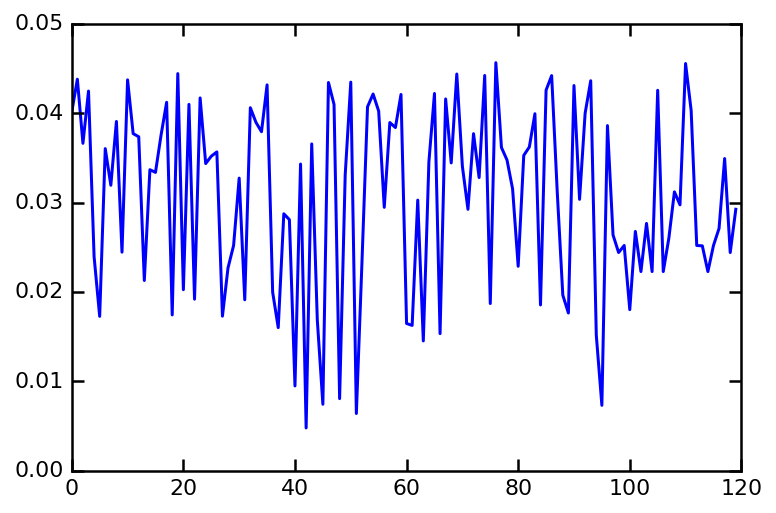

In [ ]:
df_dissim["Average_Cos_Similarity_Score"].plot()

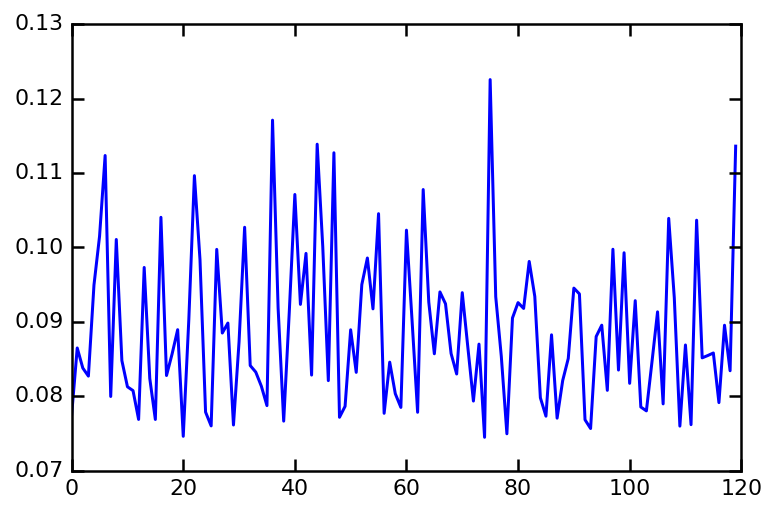

In [ ]:
df_sim["Average_Cos_Similarity_Score"].plot()

## Sorting by cosine value for sim & dis

In [ ]:
# Textually similar
df_sim_sort = df_sim.copy()
df_sim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
0,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.029530,0.037285,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
1,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.028173,0.039369,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
2,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.041752,0.052553,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
3,1513,1328104,defect,Add Search Engine Button Does Not Work,Firefox,Search,RESOLVED,0.030858,0.041078,0.082702,DUPLICATE,2017-03-31 07:05:33,user agent mozilla gecko firefox ...,1323525.0
4,1626,1333599,defect,URL Spoofing by using onbeforeunload and openi...,Firefox,Address Bar,RESOLVED,0.038145,0.051607,0.094942,DUPLICATE,2020-07-09 13:23:51,i have noticed that the onbeforeunload dialog ...,1481994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4935,1418563,defect,Close firefox force,Firefox,Untriaged,RESOLVED,0.031508,0.041096,0.085808,DUPLICATE,2017-11-18 13:21:29,user agent mozilla gecko firefox ...,613785.0
116,4958,1378023,defect,Black tab strip background in nightly makes so...,Firefox,Theme,RESOLVED,0.029496,0.037935,0.079139,DUPLICATE,2017-07-04 01:29:53,created attachment dark favicons on dark tab...,1369026.0
117,4960,1398128,defect,Height of URL bar changes when focused when co...,Firefox,Theme,RESOLVED,0.031270,0.040722,0.089539,DUPLICATE,2017-09-12 05:00:34,created attachment focused tab bar png user...,1397278.0
118,5046,1398358,defect,Library > Downloads Panel does not know if a d...,Firefox,Downloads Panel,RESOLVED,0.029256,0.037887,0.083420,DUPLICATE,2017-09-13 09:30:19,user agent mozilla gecko firefox ...,1395615.0


In [ ]:
#highest textual similarity in textual similar dataset
df_sim_sort= df_sim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending=False, inplace=False, kind='quicksort')
df_sim_sort.reset_index(drop=True, inplace=True)
df_sim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
0,4149,1370205,defect,Bug 1355764 causes graphics glitches in tab bar,Firefox,Theme,RESOLVED,0.040157,0.055904,0.122554,DUPLICATE,2017-06-05 08:02:35,created attachment screenshot png since the...,1369949.0
1,3315,1404597,defect,Opening a new tab and browse to a website is n...,Firefox,Extension Compatibility,RESOLVED,0.035252,0.051016,0.117103,DUPLICATE,2017-09-30 10:42:52,user agent mozilla gecko firefox ...,1404424.0
2,3570,1421008,defect,Bookmark Library Doesn't Show Parent Folder of...,Firefox,Bookmarks & History,RESOLVED,0.037253,0.051849,0.113871,DUPLICATE,2017-11-28 01:30:41,user agent mozilla gecko firefox ...,469421.0
3,5066,1400616,defect,Page title text shows through tabs,Firefox,Tabbed Browser,RESOLVED,0.041873,0.055588,0.113610,DUPLICATE,2017-09-18 02:06:28,created attachment tabs png user agent moz...,1398582.0
4,3614,1401947,defect,Please add an option on the about:home and abo...,Firefox,New Tab Page,RESOLVED,0.034764,0.046746,0.112720,DUPLICATE,2019-06-28 14:29:46,user agent mozilla gecko firefox ...,1400052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4875,1403061,defect,Internal IP disclosure,Firefox,Untriaged,RESOLVED,0.028865,0.035707,0.075979,DUPLICATE,2017-09-26 03:19:01,created attachment internal ip html user ag...,959893.0
116,4592,1402696,defect,Tabs names is not visible enough using the dar...,Firefox,Theme,RESOLVED,0.029091,0.036546,0.075658,DUPLICATE,2017-09-26 05:46:56,created attachment png user agent...,1401933.0
117,4247,1399826,defect,uBlock Origin stops pages from loading and han...,Firefox,Extension Compatibility,RESOLVED,0.029696,0.037493,0.074947,DUPLICATE,2017-11-10 14:28:44,user agent mozilla gecko firefox ...,1398099.0
118,2323,1361209,defect,"""Firefox"" logo-text in upper left of stub inst...",Firefox,Installer,RESOLVED,0.027713,0.037408,0.074609,DUPLICATE,2017-08-30 10:24:38,created attachment screenshot of firefox s...,1337856.0


In [ ]:
df_sim_sort= df_sim_sort[:385]
df_sim_sort= df_sim_sort.sample(frac=1).reset_index(drop=True)
df_sim_sort['Average_Cos_Similarity_Score'].values.tolist()

In [ ]:
# Textually dissimilar
df_dissim_sort = df_dissim.copy()
df_dissim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
0,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.010312,0.015288,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
1,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.014964,0.020157,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
2,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.009494,0.015773,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
3,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.015985,0.019335,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
4,312,1386531,enhancement,Add smile/sad face image for the default brows...,Firefox,Preferences,RESOLVED,0.009071,0.011686,0.023955,DUPLICATE,2017-08-09 09:16:16,add smile sad face image for the default brows...,1361957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3036,1414181,defect,Intermittent services/sync/tests/unit/test_syn...,Firefox,Sync,RESOLVED,0.012882,0.016016,0.025214,DUPLICATE,2017-11-05 17:42:55,filed by nbeleuzu at mozilla com job id...,1368209.0
116,3089,1398384,defect,Intermittent browser/components/sessionstore/t...,Firefox,Session Restore,RESOLVED,0.012568,0.015949,0.027125,DUPLICATE,2017-09-17 18:45:09,filed by wkocher at mozilla com job id ...,1034036.0
117,3113,1386231,defect,Please make addon icons movable inside the loc...,Firefox,Address Bar,RESOLVED,0.011705,0.014853,0.034953,DUPLICATE,2017-11-30 06:24:55,created attachment regression png nightly ...,1407972.0
118,3160,1388598,defect,Intermittent browser/base/content/test/siteIde...,Firefox,Site Identity,RESOLVED,0.011905,0.014923,0.024423,DUPLICATE,2017-10-01 18:47:58,filed by philringnalda at gmail com job...,1315092.0


In [ ]:
# Lowest textual similarity in textual dissimilarity dataset
df_dissim_sort= df_dissim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending= True, inplace=False, kind='quicksort')
df_dissim_sort= df_dissim_sort[:385]
df_dissim_sort

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
42,1776,1357312,enhancement,Update Checkbox component,Firefox,Preferences,RESOLVED,0.001862,0.002367,0.004778,DUPLICATE,2017-06-28 17:54:09,make checkbox component become photon style,1377021.0
51,1869,1357315,enhancement,Update input field component,Firefox,Preferences,RESOLVED,0.002443,0.003116,0.006394,DUPLICATE,2017-06-28 17:54:25,make input field component become photon style,1377021.0
95,2649,1358722,defect,1.43ms uninterruptible reflow at updateLWTStyl...,Firefox,Toolbars and Customization,RESOLVED,0.004060,0.004917,0.007310,DUPLICATE,2018-03-20 08:49:57,here s the stack updatelwtstyling resource ...,1430747.0
45,1801,1357313,enhancement,Update radio button component,Firefox,Preferences,RESOLVED,0.002444,0.003221,0.007430,DUPLICATE,2017-06-28 17:54:16,make radio button component become photon style,1377021.0
48,1839,1357314,enhancement,Update button component,Firefox,Preferences,RESOLVED,0.002427,0.003296,0.008058,DUPLICATE,2017-06-28 17:54:20,make button component become photon style,1377021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2231,1390629,defect,Library window should disable most of the 'vie...,Firefox,Toolbars and Customization,RESOLVED,0.012387,0.017999,0.044259,DUPLICATE,2017-09-22 06:57:36,on nightly and os x the library win...,1402059.0
69,2164,1346334,enhancement,Add Sync Now function to desktop sync preferences,Firefox,Sync,RESOLVED,0.012987,0.017138,0.044422,DUPLICATE,2019-09-24 15:50:29,this is a ux focused bug there might be a rel...,1570567.0
19,913,1402985,defect,Investigate failing SyncView,Firefox,Sync,RESOLVED,0.016975,0.022691,0.044466,DUPLICATE,2017-09-25 20:17:54,syncview has been failing in airflow for a c...,1402833.0
110,2957,1329482,defect,Removing Link In New Tab Freezes Other Links,Firefox,New Tab Page,RESOLVED,0.015004,0.020058,0.045596,DUPLICATE,2017-09-21 06:17:02,what did you do clicked o...,1289185.0


In [ ]:
df_dissim_sort= df_dissim_sort.sample(frac=1).reset_index(drop=True)
df_dissim_sort['Average_Cos_Similarity_Score'].values.tolist()